In [2]:
! pip install seaborn

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from styles import fig_size

print(fig_size)

df1 = pd.read_csv('data/baby_name_counts.csv')
df2 = pd.read_csv('data/baby_names.csv')


df = df2.join(df1)

df = df.dropna()

df







(4, 2.5)


,Names,Counts
0,A,5.0
1,A-Jay,5.0
3,Aaban,4.0
5,Aadam,90.0
8,Aaden,5.0
...,...,...
16763,Zy'Aire,3.0
16767,Zyair,4.0
16768,Zyaire,14.0
16769,Zyan,19.0


In [104]:
df.Counts.describe()

count    6202.000000
mean       47.574492
std       227.288590
min         3.000000
25%         4.000000
50%         6.000000
75%        16.000000
max      4525.000000
Name: Counts, dtype: float64

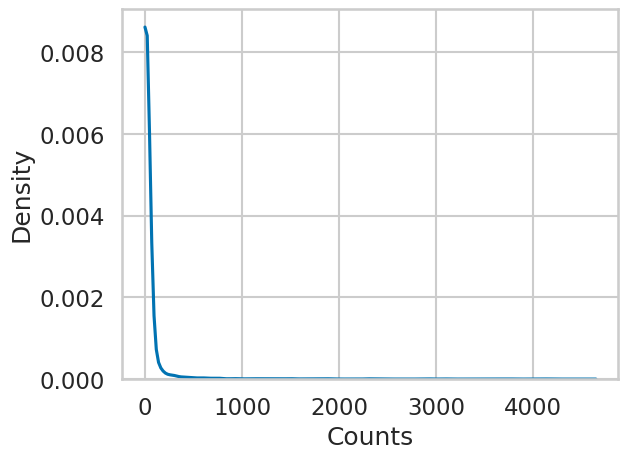

In [10]:
plt.figure()
sns.kdeplot(data=df, x='Counts', clip=[0, None])
#plt.yscale('log')
plt.show()

            Counts         freq
count  6202.000000  6202.000000
mean     47.574492     0.000161
std     227.288590     0.000770
min       3.000000     0.000010
25%       4.000000     0.000014
50%       6.000000     0.000020
75%      16.000000     0.000054
max    4525.000000     0.015336
Nathan 595.0
Sunny 56.0
Louie 1461.0
Ahmed 254.0
Abdul 214.0
Jaxon 1210.0
Alparslan 13.0
Dominic 504.0
Hasan 62.0
Louie 1461.0
Alfred 739.0
Elis 147.0
Finn 788.0
Theo 2514.0
Alfie 2338.0
Maxwell 325.0
James 1772.0
Cole 265.0
Roman 1923.0
Oliver 4167.0
Diego 96.0
Josiah 214.0
Haralambos 3.0
Kipp 5.0
Oluwademilade 5.0
Oliver 4167.0
Cian 136.0
Reggie 1287.0
Ernie 136.0
Castiel 16.0
Toby 918.0
Max 1650.0
Theo 2514.0
Dylan 1099.0
Thomas 2302.0
Reign 138.0
Kolbie 7.0
Zak 96.0
George 4141.0
Charlie 2674.0
Umar 188.0
Leo 3465.0
Riley 817.0
George 4141.0
Lennon 185.0
Martin 208.0
Dawud 109.0
Jesse 929.0
Zayaan 160.0
Roman 1923.0
Jack 2847.0
Reggie 1287.0
Reggie 1287.0
Reginald 214.0
Alessandro 61.0
Toby 918.0
Hu

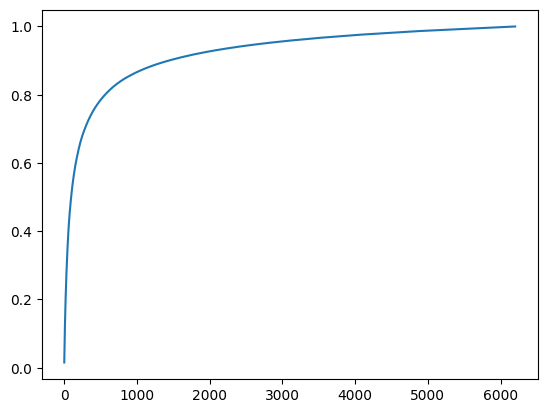

       names
count   1000
unique   499
top     Noah
freq      21


In [208]:
print(df.describe())
names = []
counts = {}
for i, row in df.iterrows():
    names_i = [row['Names']] * int(row['Counts'])
    names += names_i
    counts[row['Names']] = row['Counts']

np.random.shuffle(names)
names_i = np.random.choice(names, int(1000))

for name in names_i:
    print(name, counts[name])

plt.figure()
df_i = pd.DataFrame(data={'names': names_i})

plt.plot(np.arange(0, len(df)), np.cumsum(df.Counts.to_numpy() / df.Counts.sum()))
#sns.countplot(data=df_i, x='names', order=df_i['names'].value_counts().index)
#sns.kdeplot(data=df_i, x='names', order=df_i['names'].value_counts().index)
#sns.lineplot(x=np.linspace(0, 1000), y=40 * np.linspace(0, 1000)**-1.5)
plt.show()

print(df_i.describe())



In [195]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from tqdm import tqdm

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

y_pred = []

names_i = np.unique(names_i)

for name in tqdm(names_i):

    nlp = pipeline("ner", model=model, tokenizer=tokenizer)
    example = f"Good morning {name} how can i help you?"

    ner_results = nlp(example)

    # if no response
    if not ner_results:
        y_pred.append(0)
        continue

    # log 1 if a name was found.
    y_pred_i = 0
    for item in ner_results:
        # https://huggingface.co/dslim/bert-base-NER
        if item['entity'] in ['B-PER', 'I-PER'] and item['index'] == 3:
            y_pred_i = 1
    y_pred.append(y_pred_i)

assert len(y_pred) == len(names_i)

y_true = np.ones(len(names_i))
acc = accuracy_score(y_true, y_pred)
print(f'accuracy {acc:.2f}')

dfr = pd.DataFrame(data={
    'names': names_i,
    'y_pred': y_pred
})

dfr.to_csv('data/ner_deep_learning_results.csv')

print(dfr[dfr.y_pred == 0])

  3%|▎         | 14/480 [00:02<01:19,  5.83it/s]

hey


  6%|▌         | 27/480 [00:03<00:55,  8.20it/s]

hey


 10%|█         | 48/480 [00:07<00:41, 10.34it/s]

hey


 19%|█▉        | 91/480 [00:11<00:32, 12.10it/s]

hey
hey


 23%|██▎       | 111/480 [00:14<00:45,  8.07it/s]

hey


 24%|██▎       | 113/480 [00:14<00:48,  7.64it/s]

hey


 28%|██▊       | 136/480 [00:16<00:31, 10.83it/s]

hey


 29%|██▉       | 140/480 [00:17<00:38,  8.94it/s]

hey


 40%|███▉      | 191/480 [00:23<00:28, 10.19it/s]

hey


 48%|████▊     | 232/480 [00:27<00:21, 11.42it/s]

hey


 50%|█████     | 240/480 [00:28<00:22, 10.68it/s]

hey


 54%|█████▎    | 257/480 [00:29<00:21, 10.15it/s]

hey


 61%|██████    | 291/480 [00:32<00:14, 12.88it/s]

hey


 63%|██████▎   | 301/480 [00:33<00:17, 10.14it/s]

hey


 67%|██████▋   | 321/480 [00:35<00:13, 12.14it/s]

hey


 68%|██████▊   | 325/480 [00:35<00:13, 11.25it/s]

hey


 70%|███████   | 336/480 [00:37<00:15,  9.29it/s]

hey


 72%|███████▏  | 344/480 [00:38<00:15,  8.91it/s]

hey


 74%|███████▍  | 355/480 [00:39<00:11, 10.66it/s]

hey


 77%|███████▋  | 371/480 [00:40<00:09, 11.03it/s]

hey


 79%|███████▉  | 379/480 [00:41<00:11,  9.02it/s]

hey
hey


 84%|████████▎ | 401/480 [00:43<00:06, 11.82it/s]

hey


 85%|████████▌ | 409/480 [00:44<00:06, 11.59it/s]

hey


 86%|████████▌ | 413/480 [00:45<00:06,  9.85it/s]

hey


 89%|████████▉ | 429/480 [00:46<00:04, 10.89it/s]

hey


 91%|█████████ | 437/480 [00:47<00:03, 12.56it/s]

hey
hey


 97%|█████████▋| 467/480 [00:49<00:01, 10.49it/s]

hey


100%|██████████| 480/480 [00:51<00:00,  9.39it/s]

hey
accuracy 0.91
          names  y_pred
12         Ahad       0
25       Alfred       0
46         Ates       0
48      Atticus       0
85      Castiel       0
89      Charlie       0
91           Cj       0
99       Cormac       0
103       Denas       0
109        Drin       0
111      Edison       0
114        Eesa       0
126        Emir       0
134      Fabian       0
138       Filip       0
188      Idrees       0
197     Isma'Il       0
229       Johan       0
238        Jude       0
254        Kobe       0
287       Lucca       0
288       Lucus       0
298        Manu       0
318          Md       0
323       Miles       0
334       Mumin       0
342        Nico       0
352          Om       0
366     Phoenix       0
368      Prince       0
377        Reid       0
378      Remell       0
380        Renz       0
393  Roman-John       0
399       Rudie       0
406       Sahib       0
411         Seb       0
426         Tai       0
427        Taim       0
434        Tegh       

In [88]:
dfr[dfr['y_pred'] == 0].names.to_list()

['Aryan',
 'August',
 'Boston',
 'Brixton',
 'Cairo',
 'Castiel',
 'Csongor',
 'Danish',
 'Denver',
 'Genesis',
 'Harlem',
 'Holland',
 'Indiana',
 'Islam',
 'Israel',
 'Jersey',
 'King',
 'Legacy',
 'Leyton',
 'London',
 'Lucca',
 'Memphis',
 'Milan',
 'Navy',
 'Oslo',
 'Paris',
 'Riyadh',
 'Rogue',
 'Rome',
 'Saxon',
 'Sheikh',
 'Sire',
 'Sri',
 'Sydney',
 'Thai',
 'Zaire',
 'Zanda',
 'Zealand']

In [94]:
df['freq'] = df['Counts'] / df['Counts'].sum()

df = df.sort_values('freq', ascending=False)
df

,Names,Counts,freq
11488,Noah,4525.0,0.015336
11699,Oliver,4167.0,0.014123
5470,George,4141.0,0.014035
1633,Arthur,3766.0,0.012764
10859,Muhammad,3722.0,0.012615
...,...,...,...
6055,Harrison-James,3.0,0.000010
969,Alieu,3.0,0.000010
15282,Tiano,3.0,0.000010
15288,Tibo,3.0,0.000010
